# Project Proposal: Building a Classifier to Predict Diabetes

# 1. Introduction

# 2. Preliminary Analysis

Our GitHub repository can be found at: https://github.com/hesoru/DSCI_100_Diabetes_Prediction

### Dataset Source

Our dataset was obtained from Kaggle at the following URL: 

https://www.kaggle.com/datasets/mathchi/diabetes-data-set?fbclid=IwAR1DMzdJFDxoEqLDIZNTi3j7YJXTx_7BJwCl7sbn8syQKbQCnHfMtlsKH1E

This dataset was uploaded by user Mehmet Akturk and was sourced from the National Institute of Diabetes and Digestive and Kidney Diseases (donated by RMI Group Leader Vincent Sigillito).

### Methods
The study population consisted of 768 female patients of at least 21 years of age and Pima Indian heritage, living near Phoenix, Arizona, USA. Researchers collected the following data:
 1. Number of times pregnant
 2. Plasma glucose concentration level at 2 hours in an oral glucose tolerance test (ie. glucose test, mg/dl)
 3. Diastolic blood pressure (mmHg)
 4. Triceps skin fold thickness - a measure of body fat (mm)
 5. 2-Hour serum insulin (µU/mL)
 6. Body mass index (kg/m^2)
 7. Diabetes pedigree function (probability of diabetes based on family history) 
 8. Age
 9. Outcome (0 = glucose test negative for diabetes 5+ years after data collection, 1 = glucose test positive for diabetes within 5 years of data collection)

Diabetes was diagnosed by a plasma glucose concentration level greater than 200 mg/dl at 2 hours in an oral glucose tolerance test. All patients had a negative glucose test for diabetes at initial data collection. 

In [26]:
set.seed(1000)

#install.packages("tidyverse")
#install.packages("tidymodels")
install.packages("gridExtra")

library("tidyverse")
library("tidymodels")
library("gridExtra")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Tidying and Filtering Data

In [5]:
diabetes_dataset <- read_csv("Dataset/diabetes.csv")
diabetes_dataset
# dataset appears to have no N/A values, will check with drop_na

diabetes_dataset_no_NA <- drop_na(diabetes_dataset)
dim(diabetes_dataset_no_NA)
dim(diabetes_dataset)
# both have the same dimensions, so data is already clean

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


[1] 768   9

[1] 768   9

To narrow down parameters for classification, we will only be using modifiable/reversible variables in analysis. These include:

1. Plasma glucose concentration level at 2 hours in an oral glucose tolerance test (ie. glucose test, mg/dl)
2. Diastolic blood pressure (mmHg)
3. Triceps skin fold thickness - a measure of body fat (mm)
4. 2-Hour serum insulin (µU/mL)
5. Body mass index (kg/m^2)

We will remove irreversible or non-modifiable variables: pregnancies (not a reversible variable), diabetes pedigree function (probability of diabetes based on family history, not modifiable), and age.

In [14]:
diabetes_dataset_filtered <- diabetes_dataset |>
    select(Glucose, BloodPressure, SkinThickness, Insulin, BMI, Outcome)
diabetes_dataset_filtered

Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
148,72,35,0,33.6,1
85,66,29,0,26.6,0
183,64,0,0,23.3,1
89,66,23,94,28.1,0
137,40,35,168,43.1,1
116,74,0,0,25.6,0
78,50,32,88,31.0,1
115,0,0,0,35.3,0
197,70,45,543,30.5,1


## Split Clinical Data into Training and Testing Sets

In [15]:
diabetes_dataset_filtered_split <- initial_split(data = diabetes_dataset_filtered, prop = 0.75, strata = Outcome)
diabetes_dataset_filtered_training <- training(diabetes_dataset_filtered_split)
diabetes_dataset_filtered_testing <- testing(diabetes_dataset_filtered_split)

diabetes_dataset_filtered_training
diabetes_dataset_filtered_testing

Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
85,66,29,0,26.6,0
116,74,0,0,25.6,0
115,0,0,0,35.3,0
139,80,0,0,27.1,0
126,88,41,235,39.3,0
99,84,0,0,35.4,0
97,66,15,140,23.2,0
145,82,19,110,22.2,0
109,75,26,0,36.0,0


Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
148,72,35,0,33.6,1
89,66,23,94,28.1,0
137,40,35,168,43.1,1
110,92,0,0,37.6,0
166,72,19,175,25.8,1
100,0,0,0,30.0,1
118,84,47,230,45.8,1
103,30,38,83,43.3,0
125,70,26,115,31.1,1


## Exploration of Training Data

In [25]:
patient_means_by_outcome <- diabetes_dataset_filtered_training |>
    group_by(Outcome) |>
    summarise(Patients = n(),
              Mean_Glucose = mean(Glucose),
              Mean_BP = mean(BloodPressure),
              Mean_SkinThickness = mean(SkinThickness),
              Mean_Insulin = mean(Insulin),
              Mean_BMI = mean(BMI))
patient_means_by_outcome

Outcome,Patients,Mean_Glucose,Mean_BP,Mean_SkinThickness,Mean_Insulin,Mean_BMI
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,375,109.9947,68.81600,19.72533,67.73333,30.79467
1,201,141.2139,70.21891,21.48259,98.86567,34.98856


- 0 = negative glucose test for diabetes 5 years after data collection
- 1 = positive glucose test for diabetes within 5 years of data collection

**Interpretation:**
- 201/576 patients received a positive glucose test for diabetes (1) within 5 years of data collection. This implies a startling rate of diabetes development, however it is possible that some patients were already diabetic at data collection (false negatives).
- There is a large relative difference (at least 25%) in Mean_Glucose and Mean_Insulin between pre-diabetics and non-diabetics.

In [87]:
patient_distribution_glucose <- diabetes_dataset_filtered_training |>
    ggplot(aes(x = Glucose)) +
    geom_histogram(bins = 10, binwidth = 5) +
    labs(x = "GTT: Glucose Plasma Concentration (mg/dl)",
         y = "Number of Patients") +
    theme(text = element_text(size = 11)) +
    theme(legend.position = "none")

patient_distribution_BP <- diabetes_dataset_filtered_training |>
    ggplot(aes(x = BloodPressure)) +
    geom_histogram(bins = 10, binwidth = 4) +
    labs(x = "Diastolic Blood Pressure (mmHg)",
         y = "Number of Patients") +
    theme(text = element_text(size = 11)) +
    theme(legend.position = "none")

patient_distribution_SkinThickness <- diabetes_dataset_filtered_training |>
    ggplot(aes(x = SkinThickness)) +
    geom_histogram(bins = 10, binwidth = 2) +
    labs(x = "Tricep Skin Thickness (mm)",
         y = "Number of Patients") +
    theme(text = element_text(size = 11)) +
    theme(legend.position = "none")

patient_distribution_Insulin <- diabetes_dataset_filtered_training |>
    ggplot(aes(x = Insulin)) +
    geom_histogram(bins = 10, binwidth = 25) +
    labs(x = "2-Hour Serum Insulin (µU/mL)",
         y = "Number of Patients") +
    theme(text = element_text(size = 11)) +
    theme(legend.position = "none")

patient_distribution_BMI <- diabetes_dataset_filtered_training |>
    ggplot(aes(x = BMI)) +
    geom_histogram(bins = 10, binwidth = 2) +
    labs(x = "Body Mass Index (kg/m^2)",
         y = "Number of Patients") +
    theme(text = element_text(size = 11)) +
    theme(legend.position = "none")

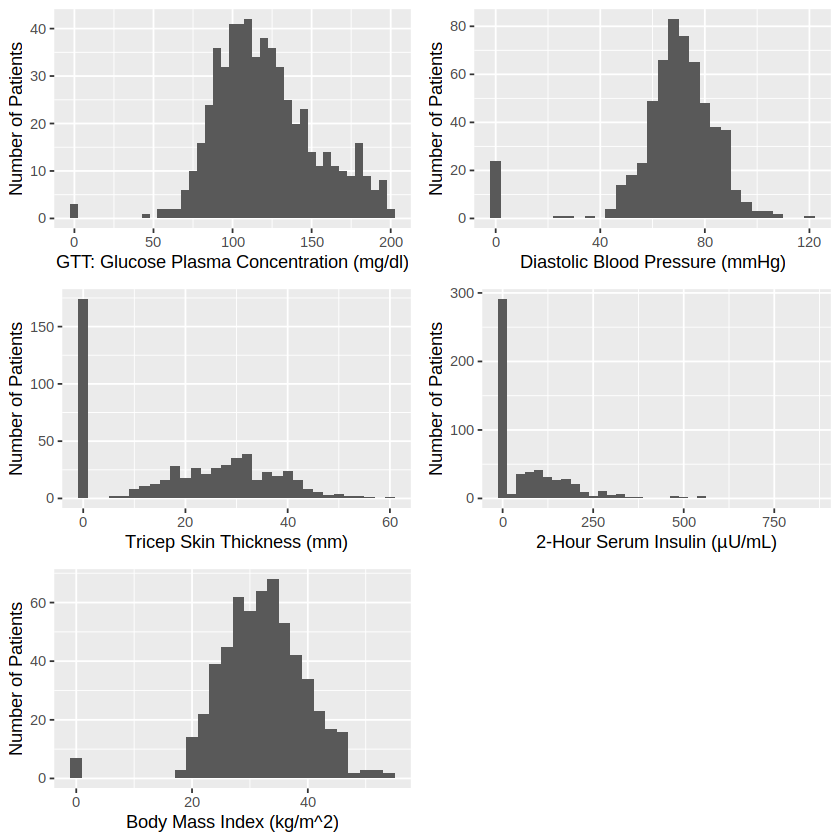

In [88]:
grid.arrange(patient_distribution_glucose,
             patient_distribution_BP,
             patient_distribution_SkinThickness,
             patient_distribution_Insulin,
             patient_distribution_BMI,
             ncol=2)

# 3. Methods

We will perform K nearest neighbors classification of our testing dataset (25% of our entire dataset):

**Parameters:**
1. Plasma glucose concentration level at 2 hours in an oral glucose tolerance test (ie. glucose test, mg/dl)
2. Diastolic blood pressure (mmHg)
3. Triceps skin fold thickness - a measure of body fat (mm)
4. 2-Hour serum insulin (µU/mL)
5. Body mass index (kg/m^2)

**Predicted class:** Outcome (whether the patient will receive a positive glucose test for diabetes in the next 5 years).


Our classifier will be trained on our training data (75% of our entire dataset). We will tune K using our training dataset and assess classifier accuracy, precision, and recall by comparing classifier outcome predictions to actual outcome in the testing dataset.


We aim to create the following visualizations:
- Bar plot with outcome on the x-axis, and sample counts under each outcome (0 and 1) based on the classifier vs. actual observations on the y-axis
- Estimated accuracy of classifier on the y-axis and neighbors on the x-axis (tuning K)
- Since we're using 5 parameters for our classifier, it's not practical to plot the training/testing data on a scatterplot including all the parameters (5 axes!)

# 4. Expected Outcomes and Significance
